# CS559: Homework #2
Assignment #2: Due on 6/25/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [125]:
import pandas as pd
data = pd.read_csv("HW2_Q1_0.csv", names= ['X','Y'])

1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

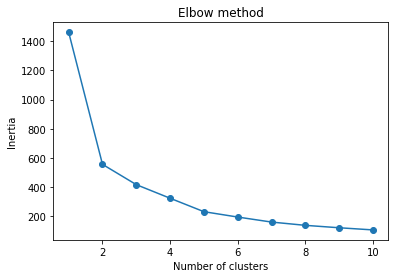

            Inertia
n = 1   1462.008530
n = 2    555.425223
n = 3    416.090217
n = 4    322.744582
n = 5    230.500209
n = 6    193.740859
n = 7    159.298404
n = 8    136.829465
n = 9    120.202450
n = 10   105.457077


In [12]:
print(plot_inertia(kmeans, data, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
k = 3
# From the graph below, we can see that the biggest change in inertia is between k=1 and k=2.
# If we follow the elbow method then we can conclude that our best k value would be 1 plus the highest
# inertia change, thus k = 3.

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

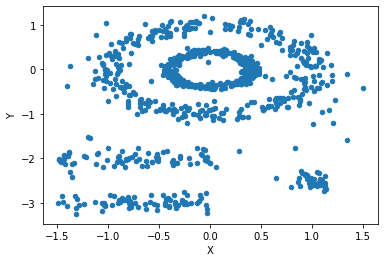

In [202]:
data.plot.scatter(x="X", y="Y")
# I do not think the pre-determined K value here is acceptable. The number seems to small and we have large clusters of
# data that don't seem to be all that closely related. From just looking at the graph, I can count 3 distinct clusters in
# the bottom half, and the top 2 "circles" could be divided in a number of ways. Thus, let's select a new k value of 5.
k = 5

1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [105]:
import random
import numpy as np
from operator import itemgetter
def MY_KMean(data, k):
    centroids = random.choices(data, k=k)
    while True:
        labels = []
        #populating clusters
        for i in range(data.size//2):
            dists = []
            for c in centroids:
                dists.append(np.linalg.norm(data[i] - c))
            labels.append(min(enumerate(dists), key=itemgetter(1))[0])
        new_centroids = []
        #Calculating new centroids (mean point of cluster)
        for i in range(k):
            mean = [0, 0]
            n = 0
            for j in range(len(labels)):
                if labels[j] == i:
                    n += 1
                    mean[0] += data[j][0]
                    mean[1] += data[j][1]
            mean[0] = mean[0] / n
            mean[1] = mean[1] / n
            new_centroids.append(mean)
        if np.all([num[0] for num in centroids] == [num[0] for num in new_centroids]) and np.all([num[1] for num in centroids] == [num[1] for num in new_centroids]):
            break
        centroids = new_centroids
    return centroids, labels

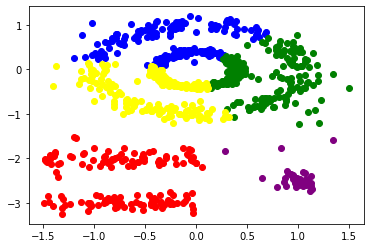

In [209]:
import matplotlib.pyplot as plt
centroids, labels = MY_KMean(data.values, k)
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'brown', 'orange', 'black', 'pink']
for c in range(len(centroids)):
    filtered_label = []
    for i in range(len(labels)):
        if labels[i] == c:
            filtered_label.append(data.values[i])
    plt.scatter([num[0] for num in filtered_label], [num[1] for num in filtered_label], color = colors[c])
plt.show()

1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [210]:
for i in range(len(centroids)):
    print("id: ", i, " centroid: ", centroids[i])

id:  0  centroid:  [-0.2026961193448277, 0.5553739287192115]
id:  1  centroid:  [-0.712330340841059, -2.4856771872847685]
id:  2  centroid:  [0.6036507055767445, -0.14675636780930235]
id:  3  centroid:  [-0.38919679861682244, -0.45659497064018667]
id:  4  centroid:  [0.9825444723809524, -2.4469452651666663]


1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

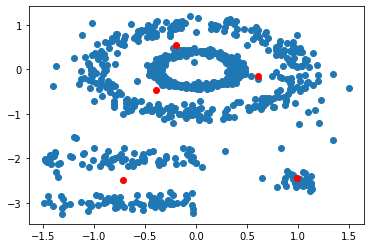

In [211]:
import matplotlib.pyplot as plt
data_labeled = data.copy()
data_labeled['Class'] = labels
plt.scatter(data_labeled['X'], data_labeled['Y'])
plt.scatter([num[0] for num in centroids], [num[1] for num in centroids], color="red")
plt.show()

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

In [169]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

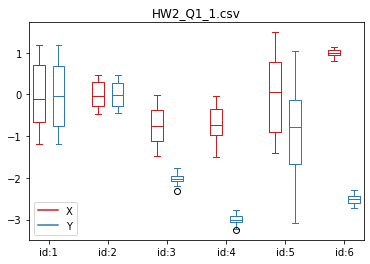

In [197]:
data2 = pd.read_csv("HW2_Q1_1.csv", names= ['X','Y','Class'])

tempx = []
tempy = []
for c in range(1, 7, 1):
    filtered_label = []
    for i in range(data2.values.size//3):
        if data2['Class'][i] == c:
            filtered_label.append(data2.values[i])
    tempx.append([num[0] for num in filtered_label])
    tempy.append([num[1] for num in filtered_label])

bpx = plt.boxplot(tempx, positions=[1, 4, 7, 10, 13, 16], widths=0.6)
bpy = plt.boxplot(tempy, positions=[2, 5, 8, 11, 14, 17], widths=0.6)
set_box_color(bpx, '#D7191C')
set_box_color(bpy, '#2C7BB6')
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ["id:1", "id:2", "id:3", "id:4", "id:5", "id:6"])
plt.plot([], c='#D7191C', label='X')
plt.plot([], c='#2C7BB6', label='Y')
plt.gca().set_title("HW2_Q1_1.csv")
plt.legend()
plt.show()

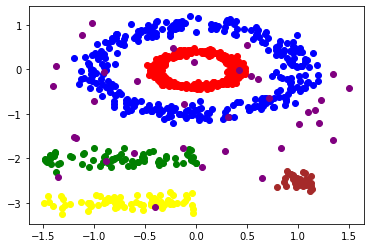

In [200]:
for c in range(1, 7, 1):
    filtered_label = []
    for i in range(data2.values.size//3):
        if data2['Class'][i] == c:
            filtered_label.append(data2.values[i])
    plt.scatter([num[0] for num in filtered_label], [num[1] for num in filtered_label], color = colors[c-1])
plt.show()

In [199]:
data2.corr()

,X,Y,Class
X,1.000000,0.189343,0.022406
Y,0.189343,1.000000,-0.710872
Class,0.022406,-0.710872,1.000000


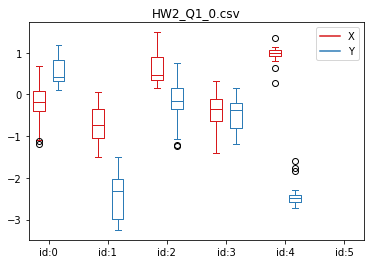

In [212]:
tempx = []
tempy = []
for c in range(6):
    filtered_label = []
    for i in range(data_labeled.values.size//3):
        if data_labeled['Class'][i] == c:
            filtered_label.append(data_labeled.values[i])
    tempx.append([num[0] for num in filtered_label])
    tempy.append([num[1] for num in filtered_label])

bpx = plt.boxplot(tempx, positions=[1, 4, 7, 10, 13, 16], widths=0.6)
bpy = plt.boxplot(tempy, positions=[2, 5, 8, 11, 14, 17], widths=0.6)
set_box_color(bpx, '#D7191C')
set_box_color(bpy, '#2C7BB6')
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ["id:0", "id:1", "id:2", "id:3", "id:4", "id:5"])
plt.plot([], c='#D7191C', label='X')
plt.plot([], c='#2C7BB6', label='Y')
plt.gca().set_title("HW2_Q1_0.csv")
plt.legend()
plt.show()

In [213]:
data_labeled.corr()

,X,Y,Class
X,1.000000,0.189343,0.258803
Y,0.189343,1.000000,-0.259389
Class,0.258803,-0.259389,1.000000


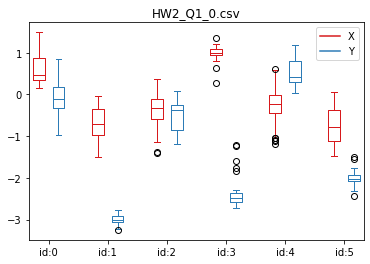

In [214]:
# My K value is not the same as the actual k value. Here is the updated clustering:
k = 6
centroids, labels = MY_KMean(data.values, k)
data_labeled = data.copy()
data_labeled['Class'] = labels

tempx = []
tempy = []
for c in range(6):
    filtered_label = []
    for i in range(data_labeled.values.size//3):
        if data_labeled['Class'][i] == c:
            filtered_label.append(data_labeled.values[i])
    tempx.append([num[0] for num in filtered_label])
    tempy.append([num[1] for num in filtered_label])

bpx = plt.boxplot(tempx, positions=[1, 4, 7, 10, 13, 16], widths=0.6)
bpy = plt.boxplot(tempy, positions=[2, 5, 8, 11, 14, 17], widths=0.6)
set_box_color(bpx, '#D7191C')
set_box_color(bpy, '#2C7BB6')
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ["id:0", "id:1", "id:2", "id:3", "id:4", "id:5"])
plt.plot([], c='#D7191C', label='X')
plt.plot([], c='#2C7BB6', label='Y')
plt.gca().set_title("HW2_Q1_0.csv Updated K")
plt.legend()
plt.show()

In [215]:
data_labeled.corr()

,X,Y,Class
X,1.000000,0.189343,-0.468769
Y,0.189343,1.000000,0.016231
Class,-0.468769,0.016231,1.000000


1-h. Evalaute your result. (5 pts)

In [216]:
# Since K-means forms roughly circular clusters, we can see that the clusters formed from our algorithm are different from
# the clusters given in the second data set. The main difference is in the 2 rings at the top of the graph. K-means wants
# to keep all of the points in a cluster close together so it splits the rings up by cutting them into sections, whereas
# the given clusters take each ring as its own cluster. This illustrates a shortcoming of k-means. Clearly there is some
# commonality to the data that form the rings, but merely looking at their proximity in X,Y coordinates is not enough
# to see the pattern.

## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

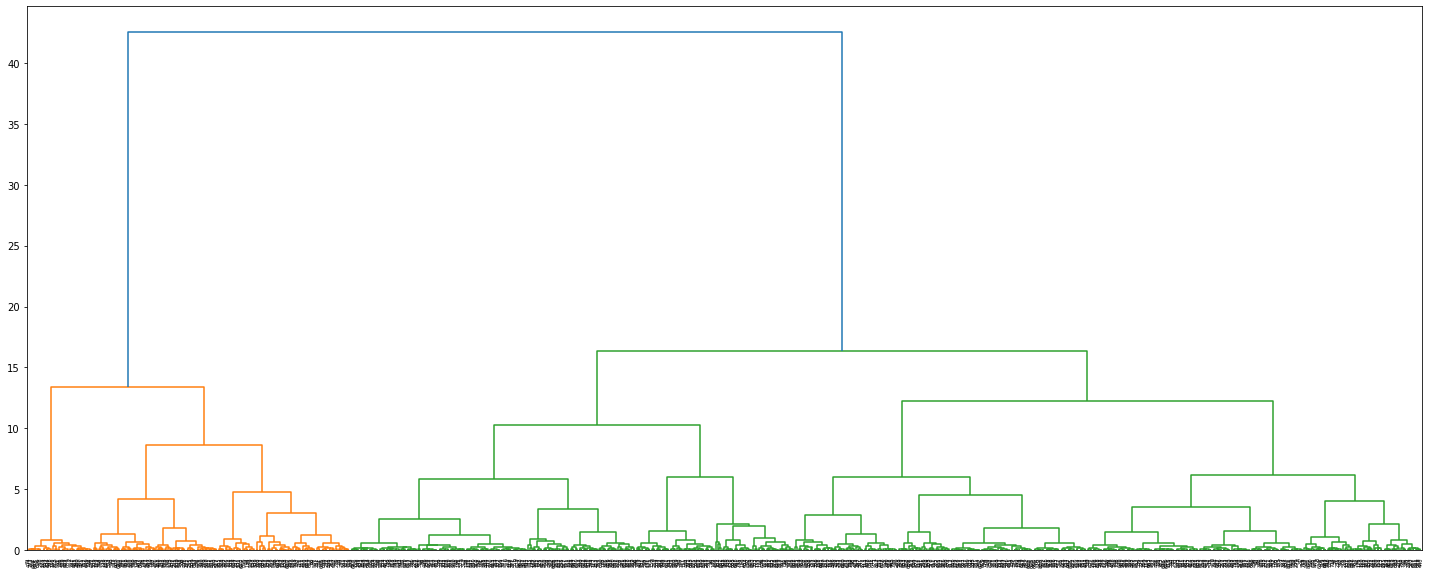

In [229]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
ward_labels = AgglomerativeClustering().fit(data)
ward = linkage(data, 'ward')
fig = plt.figure(figsize=(25, 10))
dnw = dendrogram(ward)

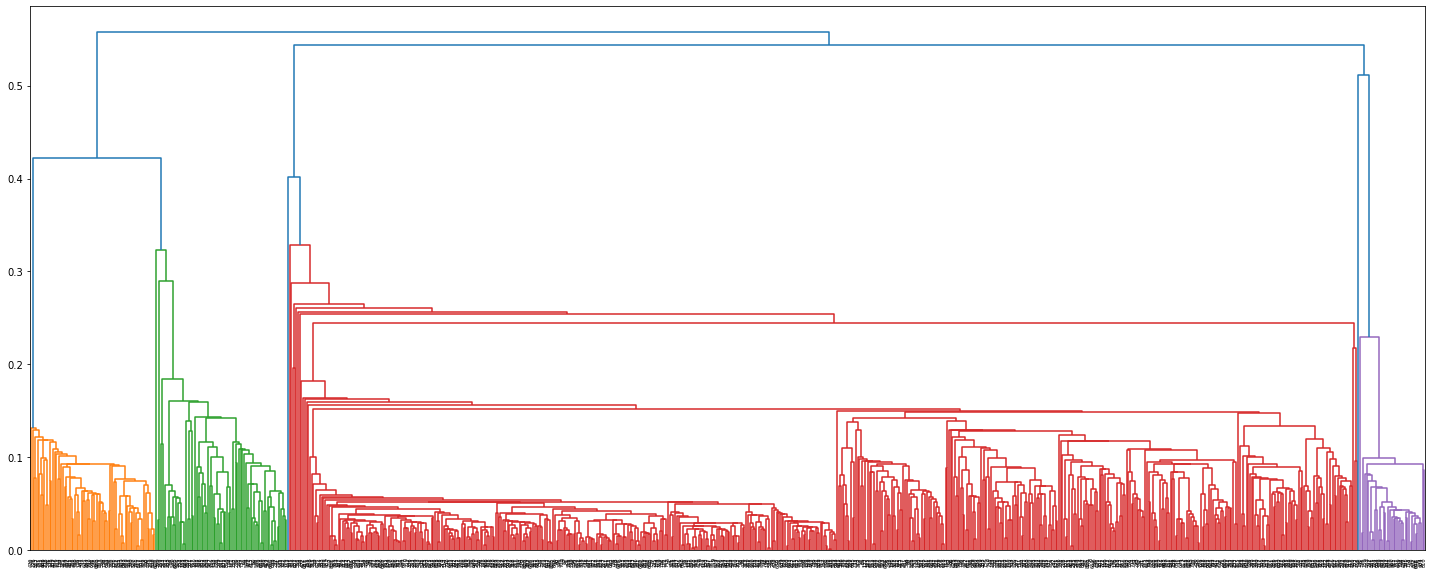

In [221]:
single = linkage(data, 'single')
fig = plt.figure(figsize=(25, 10))
dns = dendrogram(single)

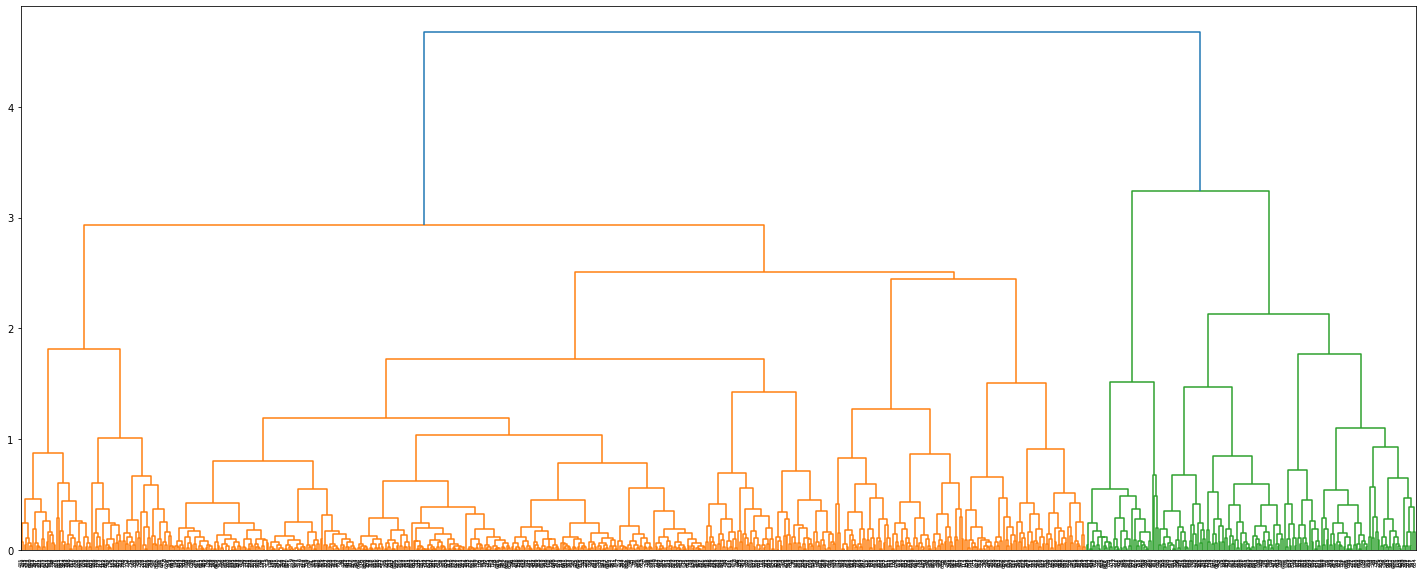

In [222]:
complete = linkage(data, 'complete')
fig = plt.figure(figsize=(25, 10))
dnc = dendrogram(complete)

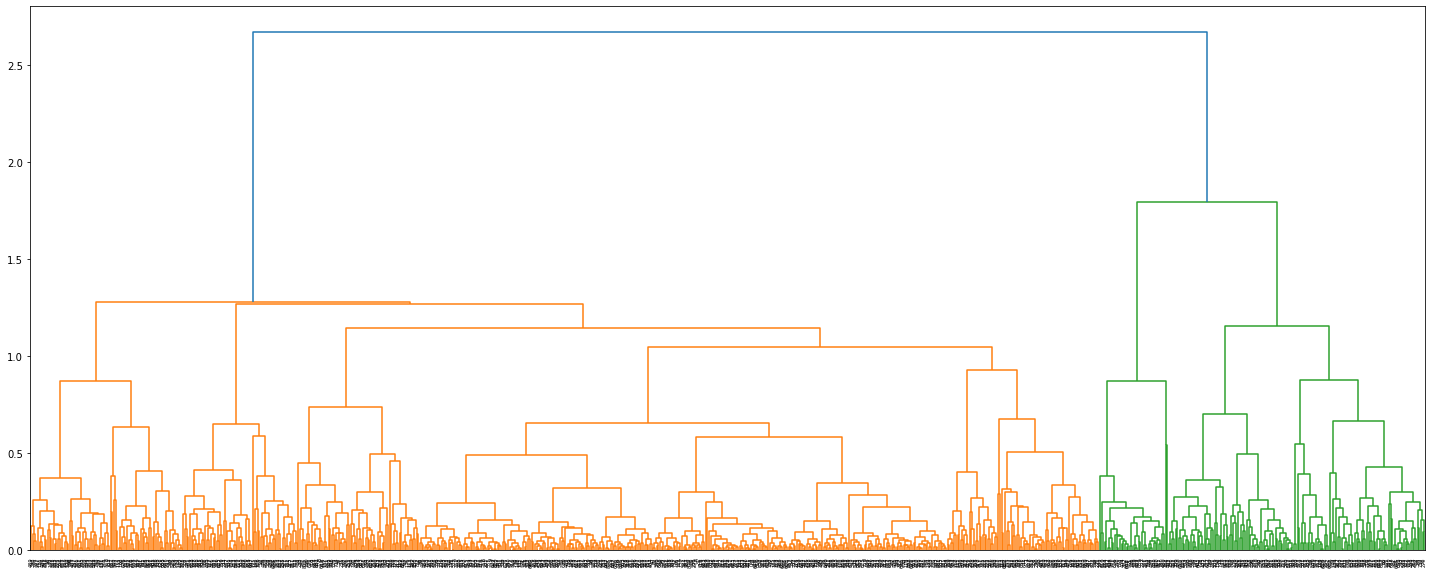

In [223]:
average = linkage(data, 'average')
fig = plt.figure(figsize=(25, 10))
dna = dendrogram(average)

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

In [232]:
# The majority of these linkages only give 2 clusters as opposed to the 6 that we have in the properly labeled data set.
# Thus, the average, complete, and ward linkages do not seem to give good results. The single linkage, however, gives 4
# clusters which is much closer to the actual result and is our best fit from the 4 linkages.

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [233]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

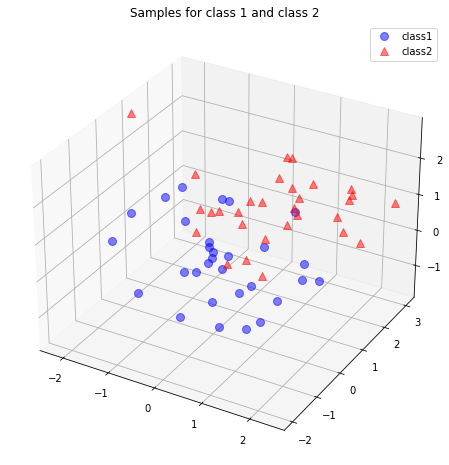

In [234]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [242]:
all_samples = np.concatenate([class1_sample, class2_sample], axis=1)
assert all_samples.shape == (3,60), "The matrix has not the dimensions 3x60"

In [244]:
mean_x = np.sum(all_samples[0])/np.size(all_samples[0])
mean_y = np.sum(all_samples[1])/np.size(all_samples[1])
mean_z = np.sum(all_samples[2])/np.size(all_samples[2])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


In [256]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    temp = [[all_samples[0][i]], [all_samples[1][i]], [all_samples[2][i]]] - mean_vector
    scatter_matrix += (temp).dot((temp.T))
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[66.33488145 15.95559213  9.38196352]
 [15.95559213 73.06156823 -0.73056383]
 [ 9.38196352 -0.73056383 73.75083116]]


In [260]:
cov_mat = np.cov(all_samples)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.12432002  0.27043376  0.15901633]
 [ 0.27043376  1.23833166 -0.01238244]
 [ 0.15901633 -0.01238244  1.25001409]]


In [263]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[-0.7638285 ]
 [ 0.55561224]
 [ 0.32842209]]
Eigenvalue 1 from scatter matrix: 50.69476547802249
Eigenvalue 1 from covariance matrix: 0.8592333131868222
Scaling factor:  58.99999999999998
------------------------------------------------------------
Eigenvector 2: 
[[0.64541215]
 [0.65992713]
 [0.38462884]]
Eigenvalue 2 from scatter matrix: 88.24042164015403
Eigenvalue 2 from covariance matrix: 1.495600366782271
Scaling factor:  59.00000000000002
------------------------------------------------------------
Eigenvector 3: 
[[ 0.00303016]
 [-0.50575808]
 [ 0.86267003]]
Eigenvalue 3 from scatter matrix: 74.21209372176277
Eigenvalue 3 from covariance matrix: 1.2578320969790298
Scaling factor:  59.000000000000014
------------------------------------------------------------


In [264]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

<ipython-input-265-35fd4ffbbb74>:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


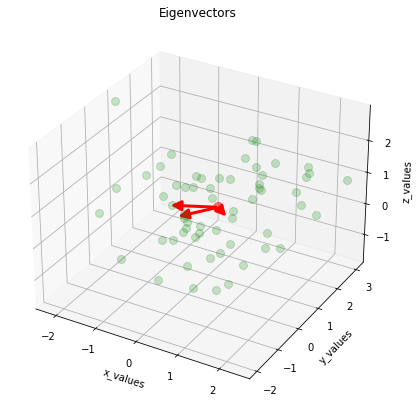

In [265]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [267]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

def eigSort(elem):
    return elem[0]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=eigSort)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

50.69476547802249
74.21209372176277
88.24042164015403


In [280]:
matrix_w = np.array([eig_pairs[i][1] for i in range(-2, 0, 1)])
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.00303016 -0.50575808  0.86267003]
 [ 0.64541215  0.65992713  0.38462884]]


In [299]:
transformed = (matrix_w).dot(all_samples)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

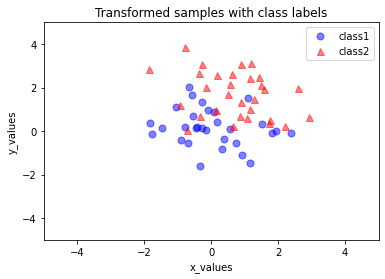

In [300]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

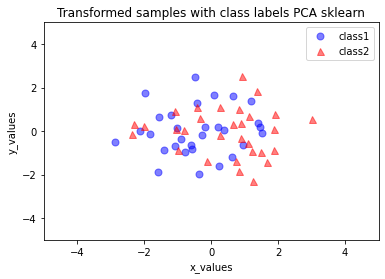

In [310]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(all_samples.reshape(60, 3))

plt.plot(pca[0:30, 0], pca[0:30, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(pca[30:60, 0], pca[30:60, 1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels PCA sklearn')

plt.show()

In [ ]:
# From the 2 graphs above, we can see that my implemented PCA has class 2 points that generally have a higher y value.
# On average, the class 2 points are more towards the top of the graph with class 1 towards the bottom.
# On the other hand, the sklearn PCA graph has class 2 points with a generally higher x value instead of y value.

### Problem 4 - Linear Regression [10 pts]

4. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$
Find an expression for the solution $w^*$ that minimizes this error function.

$$
\frac{\delta}{\delta w}{E}_{D}(𝑤⃗) = \frac{\delta}{\delta w}\frac{1}{2}∑\limits _{n=1}^{N}𝑟_{n}(𝑡_{n}−𝑤⃗𝑇𝑥⃗_{n})^2 = 0
$$
$$
\frac{\delta}{\delta w}{E}_{D}(𝑤⃗) = -∑\limits _{n=1}^{N}𝑟_{𝑛}(𝑡_{𝑛}−𝑤⃗𝑇𝑥⃗_{𝑛})(𝑥⃗_{𝑛}) = 0
$$
$$
\frac{\delta}{\delta w}{E}_{D}(𝑤⃗) = -(∑𝑟_{𝑛}𝑡_{𝑛}(𝑥⃗_{𝑛})−∑𝑟_{𝑛}𝑤⃗𝑇(𝑥⃗_{𝑛})(𝑥⃗_{𝑛})) = 0
$$
$$
\frac{\delta}{\delta w}{E}_{D}(𝑤⃗) = ∑𝑟_{𝑛}𝑡_{𝑛}(𝑥⃗_{𝑛}) = ∑𝑟_{𝑛}𝑤⃗𝑇(𝑥⃗_{𝑛})(𝑥⃗_{𝑛}) = 0
$$
$$
\frac{\delta}{\delta w}{E}_{D}(𝑤⃗) = (∑𝑟_{𝑛}𝑡_{𝑛}(𝑥⃗_{𝑛}))(∑𝑟_{𝑛}(𝑥⃗_{𝑛})(𝑥⃗_{𝑛})𝑇)^{-1} = (∑𝑟_{𝑛}(𝑥⃗_{𝑛})(𝑥⃗_{𝑛})𝑇)(∑𝑟_{𝑛}(𝑥⃗_{𝑛})(𝑥⃗_{𝑛})𝑇)^{-1}(𝑤⃗) = 0
$$
$$
(∑𝑟_{𝑛}𝑡_{𝑛}(𝑥⃗_{𝑛}))(∑𝑟_{𝑛}(𝑥⃗_{𝑛})(𝑥⃗_{𝑛})𝑇)^{-1} = (𝑤⃗)
$$